In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

591

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=37b8e6ebd6290d219d26793b30038dbb


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | norman wells
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | portland
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | aykhal
Processing Record 11 of Set 1 | bambous virieux
Processing Record 12 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 13 of Set 1 | banganapalle
Processing Record 14 of Set 1 | oum hadjer
Processing Record 15 of Set 1 | cabedelo
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | buala
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | chokurdakh
Processing 

Processing Record 35 of Set 4 | sitka
Processing Record 36 of Set 4 | hyeres
Processing Record 37 of Set 4 | tonj
Processing Record 38 of Set 4 | tiruchchendur
Processing Record 39 of Set 4 | dubbo
Processing Record 40 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 41 of Set 4 | bonanza
Processing Record 42 of Set 4 | fort-shevchenko
Processing Record 43 of Set 4 | rocha
Processing Record 44 of Set 4 | cidreira
Processing Record 45 of Set 4 | terrace
Processing Record 46 of Set 4 | mbini
Processing Record 47 of Set 4 | saint-georges
Processing Record 48 of Set 4 | half moon bay
Processing Record 49 of Set 4 | chekhov
Processing Record 50 of Set 4 | bozdar
Processing Record 1 of Set 5 | urucui
Processing Record 2 of Set 5 | east london
Processing Record 3 of Set 5 | jieshi
Processing Record 4 of Set 5 | pisco
Processing Record 5 of Set 5 | saint george
Processing Record 6 of Set 5 | fresnillo
Processing Record 7 of Set 5 | naze
Processing Record 8 of Set 5 | bandarbey

Processing Record 29 of Set 8 | rauma
Processing Record 30 of Set 8 | faya
Processing Record 31 of Set 8 | talnakh
Processing Record 32 of Set 8 | lobito
Processing Record 33 of Set 8 | namibe
Processing Record 34 of Set 8 | manadhoo
Processing Record 35 of Set 8 | marrakesh
Processing Record 36 of Set 8 | polunochnoye
Processing Record 37 of Set 8 | dibulla
Processing Record 38 of Set 8 | shamary
Processing Record 39 of Set 8 | carnarvon
Processing Record 40 of Set 8 | sabha
Processing Record 41 of Set 8 | nome
Processing Record 42 of Set 8 | gari
Processing Record 43 of Set 8 | viligili
City not found. Skipping...
Processing Record 44 of Set 8 | te anau
Processing Record 45 of Set 8 | husavik
Processing Record 46 of Set 8 | babanusah
City not found. Skipping...
Processing Record 47 of Set 8 | san quintin
Processing Record 48 of Set 8 | harrisburg
Processing Record 49 of Set 8 | north bend
Processing Record 50 of Set 8 | san andres
Processing Record 1 of Set 9 | hihifo
City not found.

Processing Record 16 of Set 12 | benjamin constant
Processing Record 17 of Set 12 | dobryanka
Processing Record 18 of Set 12 | batagay-alyta
Processing Record 19 of Set 12 | chambersburg
Processing Record 20 of Set 12 | port blair
Processing Record 21 of Set 12 | junagarh
Processing Record 22 of Set 12 | ulagan
Processing Record 23 of Set 12 | marcona
City not found. Skipping...
Processing Record 24 of Set 12 | colares
Processing Record 25 of Set 12 | juntas
Processing Record 26 of Set 12 | sterling
Processing Record 27 of Set 12 | oyem
Processing Record 28 of Set 12 | linxia
Processing Record 29 of Set 12 | burns lake
Processing Record 30 of Set 12 | ruy barbosa
Processing Record 31 of Set 12 | sabinopolis
Processing Record 32 of Set 12 | kichera
Processing Record 33 of Set 12 | locri
Processing Record 34 of Set 12 | gambela
Processing Record 35 of Set 12 | lucapa
Processing Record 36 of Set 12 | biak
Processing Record 37 of Set 12 | yovon
Processing Record 38 of Set 12 | karia
Proces

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Norman Wells,65.2820,-126.8329,-16.56,69,90,14.97,CA,2021-11-29 00:36:03
1,Castro,-24.7911,-50.0119,68.95,60,100,7.05,BR,2021-11-29 00:37:47
2,Punta Arenas,-53.1500,-70.9167,44.71,70,75,31.07,CL,2021-11-29 00:36:30
3,Tasiilaq,65.6145,-37.6368,28.56,95,100,7.00,GL,2021-11-29 00:37:47
4,Atuona,-9.8000,-139.0333,78.55,74,6,16.96,PF,2021-11-29 00:37:48
5,Butaritari,3.0707,172.7902,81.73,78,100,12.97,KI,2021-11-29 00:36:15
6,Portland,45.5234,-122.6762,62.58,65,75,8.05,US,2021-11-29 00:32:55
7,Upernavik,72.7868,-56.1549,-8.27,76,61,8.59,GL,2021-11-29 00:37:48
8,Aykhal,66.0000,111.5000,-13.22,100,100,2.19,RU,2021-11-29 00:33:16
9,Bambous Virieux,-20.3428,57.7575,71.85,88,40,4.61,MU,2021-11-29 00:37:49


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [12]:
# Create the output file (CSV).
output_data_file = "weather_datacities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

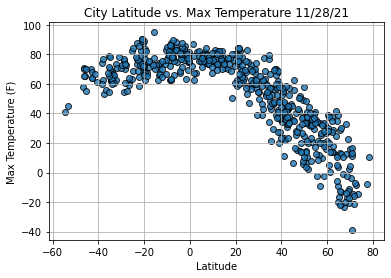

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

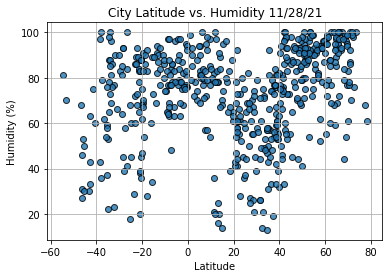

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [ ]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

In [ ]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(10,40))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))